In [1]:
import numpy as np
import matplotlib.pylab as plt
from astroquery.esasky import ESASky
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits as pyfits

from sedcreator import SedFluxer,SedFitter, ModelPlotter

Created TAP+ (v20200428.1) - Connection:
	Host: sky.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
%matplotlib notebook

## If the below cell does not work, try to download directly the data from the Herschel archive at

http://archives.esac.esa.int/hsa/whsa/

REMEMBER TO DOWNLOAD THE STANDALONE DATA!

In [3]:
#if it does not work, look at https://github.com/astropy/astropy-tutorials/issues/463
G28_coord = SkyCoord(ra='18h42m58.111s', dec='-04d13m57.779s', frame='fk5')
G28_H = ESASky.get_images(position=G28_coord,
                          radius="1 arcmin",
                          missions=['Herschel'],
                          download_dir='G28_maps')

INFO: Starting download of HERSCHEL data. (5 files) [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342218695 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8634780&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342218694 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8612979&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342218694 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8634779&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342218695 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8613005&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky

In [4]:
G28_H['HERSCHEL'][1]

{'250': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11ac0f550>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11ad4f730>, <astropy.io.fits.hdu.image.ImageHDU object at 0x105d86340>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11a85e910>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11ad4f9d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11ad4fbb0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11ad4fdf0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11ad4ffd0>],
 '350': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11ac25970>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11ad5a310>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11ad5a550>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11ad5a790>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11ad5a9d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11ad5abb0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11ad5adf0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11ad5afd0>]

<IPython.core.display.Javascript object>


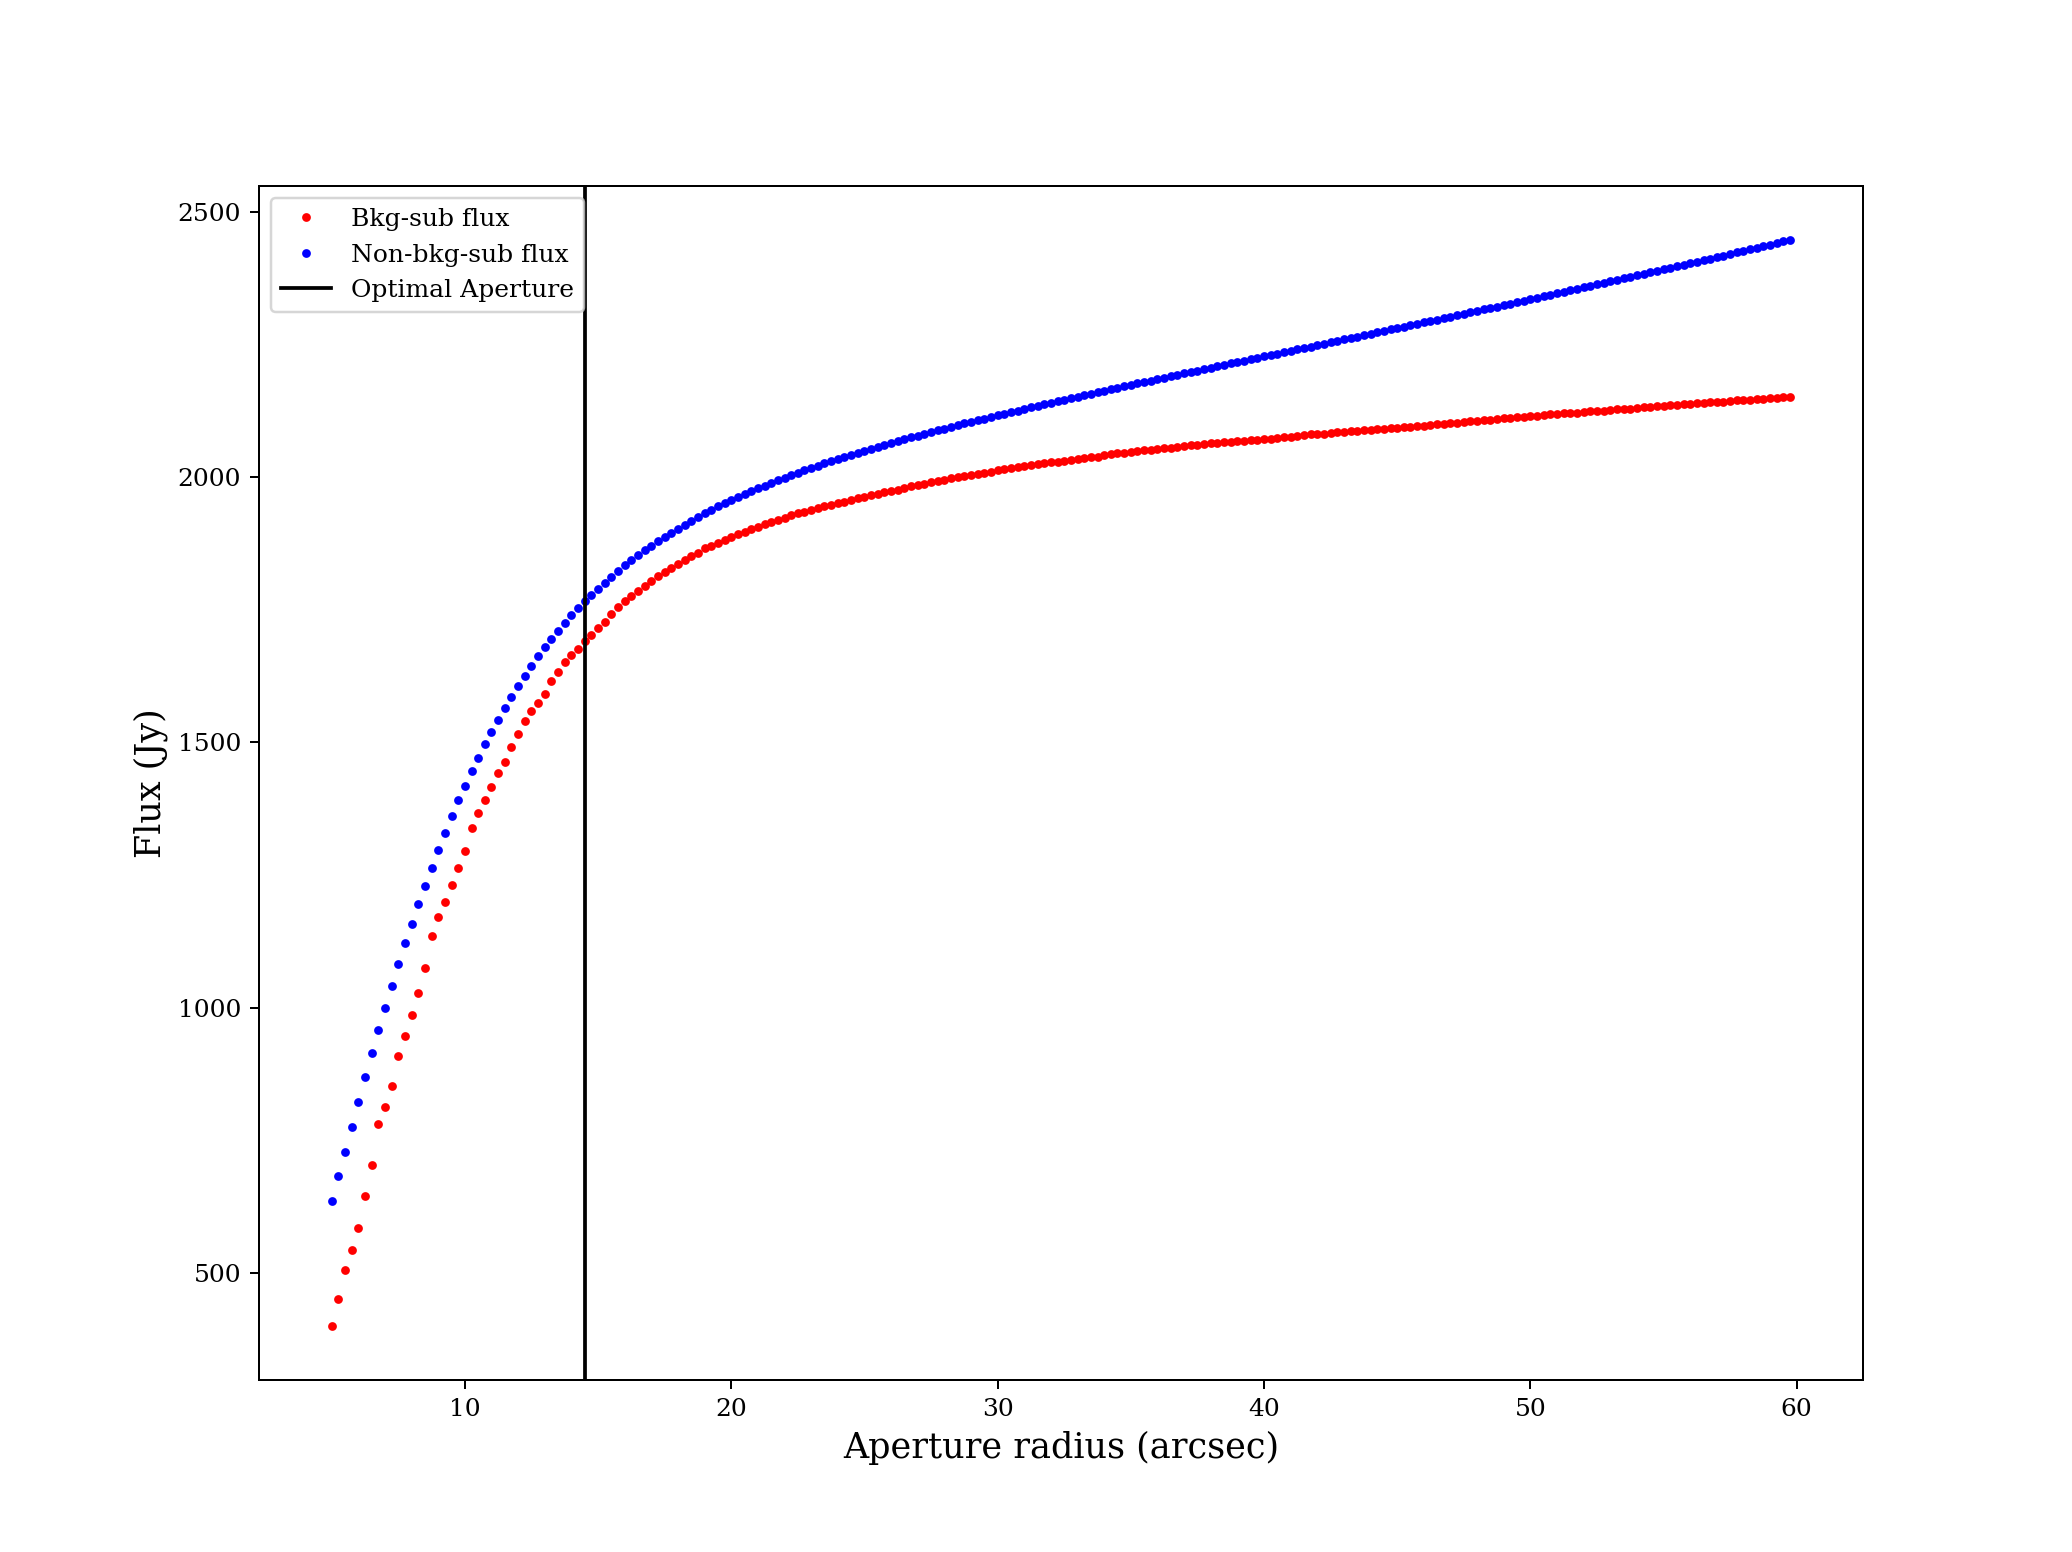

14.5

In [6]:
G28_H70_image = G28_H['HERSCHEL'][0]['70'][1]
SedFluxer(G28_H70_image).get_optimal_aperture(central_coords=G28_coord,
                                              ap_inner=5.0,ap_outer=60.0,
                                              aper_increase=1.3,threshold=1.10,profile_plot=True)

The aperture used is 20.0 arcsec
pixel scale is 3.2 arcsec/pixel
~ 6.25 pixels are used for the aperture radius
units in the image are: Jy/pixel
Regarding observing time:
You are probably using HERSCHEL, look at the first extension of the header
Regarding wavelength:
You are probably using HERSCHEL or ALMA, look at the first extension of the header
############################
Flux bkg sub 1887.0306196828622 Jy
Flux         1956.5855136118632 Jy
Background   69.55489392900108 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


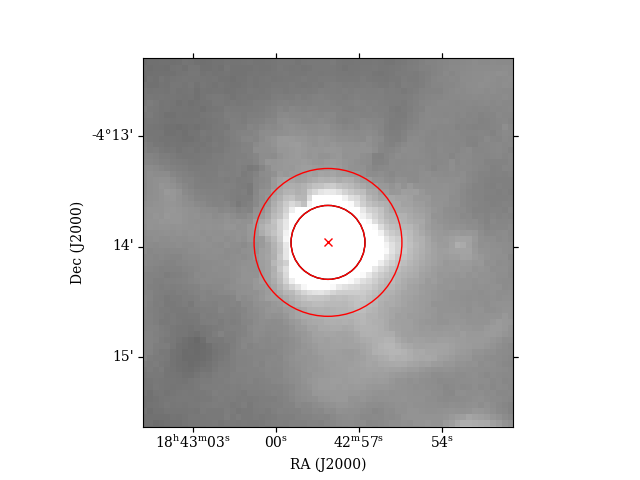

The aperture used is 20.0 arcsec
pixel scale is 3.2 arcsec/pixel
~ 6.25 pixels are used for the aperture radius
units in the image are: Jy/pixel
Regarding observing time:
You are probably using HERSCHEL, look at the first extension of the header
Regarding wavelength:
You are probably using HERSCHEL or ALMA, look at the first extension of the header
############################
Flux bkg sub 1919.7531527000256 Jy
Flux         2168.6680327995277 Jy
Background   248.91488009950217 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


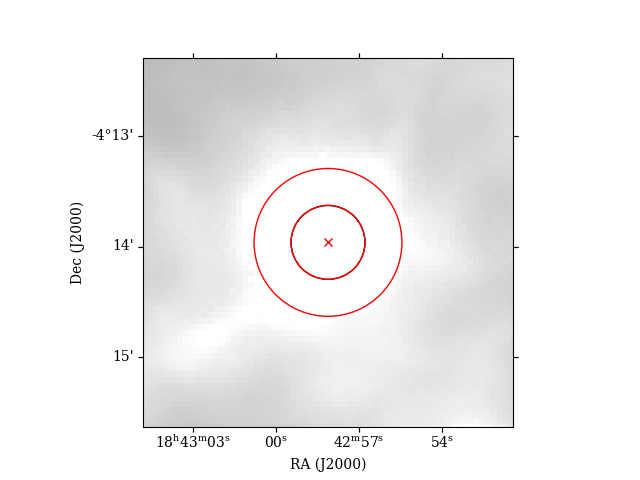

The aperture used is 20.0 arcsec
pixel scale is 6.0 arcsec/pixel
~ 3.333 pixels are used for the aperture radius
units in the image are: MJy/sr
Regarding observing time:
You are probably using HERSCHEL, look at the first extension of the header
Regarding wavelength:
You are probably using HERSCHEL or ALMA, look at the first extension of the header
############################
Flux bkg sub nan Jy
Flux         nan Jy
Background   nan Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


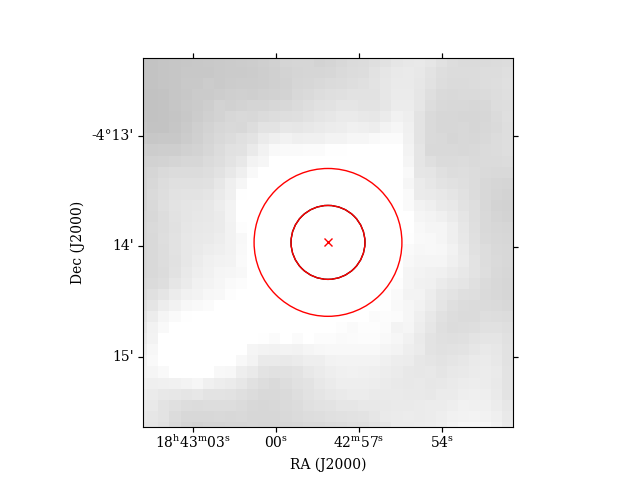

The aperture used is 20.0 arcsec
pixel scale is 10.0 arcsec/pixel
~ 2.0 pixels are used for the aperture radius
units in the image are: MJy/sr
Regarding observing time:
You are probably using HERSCHEL, look at the first extension of the header
Regarding wavelength:
You are probably using HERSCHEL or ALMA, look at the first extension of the header
############################
Flux bkg sub 230.70341877639203 Jy
Flux         314.28275971826525 Jy
Background   83.57934094187323 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


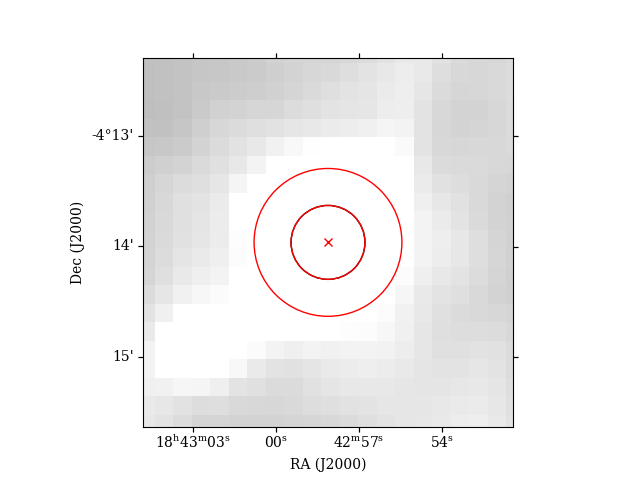

The aperture used is 20.0 arcsec
pixel scale is 14.0 arcsec/pixel
~ 1.429 pixels are used for the aperture radius
units in the image are: MJy/sr
Regarding observing time:
You are probably using HERSCHEL, look at the first extension of the header
Regarding wavelength:
You are probably using HERSCHEL or ALMA, look at the first extension of the header
############################
Flux bkg sub 45.26469239844727 Jy
Flux         78.7598984813281 Jy
Background   33.49520608288082 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


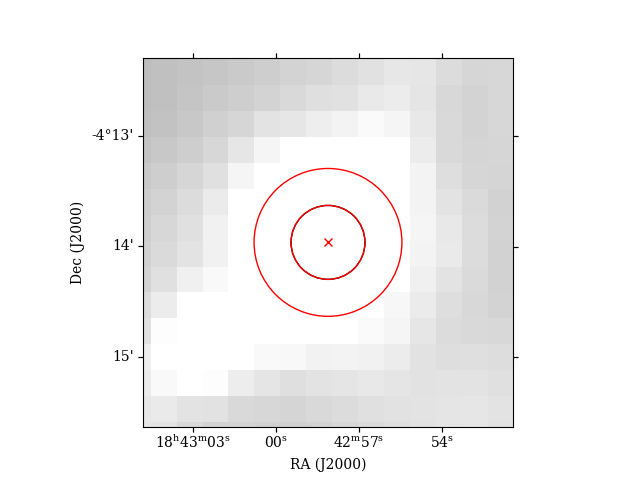

In [21]:
radius = 20.0
G28_H70_image = G28_H['HERSCHEL'][0]['70'][1]
G28_H70 = SedFluxer(G28_H70_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_H70_bkg,flux_H70=G28_H70.value
G28_H70.info
G28_H70.plot()


G28_H160_image = G28_H['HERSCHEL'][0]['160'][1]
G28_H160 = SedFluxer(G28_H160_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_H160_bkg,flux_H160=G28_H160.value
G28_H160.info
G28_H160.plot()


G28_H250_image = G28_H['HERSCHEL'][1]['250'][1]
G28_H250 = SedFluxer(G28_H250_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_H250_bkg,flux_H250=G28_H250.value
G28_H250.info
G28_H250.plot()


G28_H350_image = G28_H['HERSCHEL'][1]['350'][1]
G28_H350 = SedFluxer(G28_H350_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_H350_bkg,flux_H350=G28_H350.value
G28_H350.info
G28_H350.plot()

G28_H500_image = G28_H['HERSCHEL'][1]['500'][1]
G28_H500 = SedFluxer(G28_H500_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_H500_bkg,flux_H500=G28_H500.value
G28_H500.info
G28_H500.plot()

In [23]:
#if it does not work, look at https://github.com/astropy/astropy-tutorials/issues/463
#if it does not work, look at https://github.com/astropy/astropy-tutorials/issues/463
G28_coord = SkyCoord(ra='18h42m58.111s', dec='-04d13m57.779s', frame='fk5')
G28_S = ESASky.get_images(position=G28_coord,
                          radius="1 arcmin",
                          missions=['Spitzer'],
                          download_dir='G28_maps')

INFO: Starting download of SPITZER data. (8 files) [astroquery.esasky.core]
INFO: Downloading Observation ID: 30002561-28896 from https://irsa.ipac.caltech.edu/ibe/data/spitzer/seip_science/images//3/0002/30002561/6/30002561-28896/30002561.30002561-28896.IRAC.1.mosaic.fits [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 30002561-28175 from https://irsa.ipac.caltech.edu/ibe/data/spitzer/seip_science/images//3/0002/30002561/5/30002561-28175/30002561.30002561-28175.IRAC.1.mosaic.fits [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 30002561-28175 from https://irsa.ipac.caltech.edu/ibe/data/spitzer/seip_science/images//3/0002/30002561/5/30002561-28175/30002561.30002561-28175.IRAC.2.mosaic.fits [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 30002561-28896 from https://irsa.ipac.caltech.edu/ibe/data/spitzer/seip_science/images//3/0002/30002561/6/3

The aperture used is 16.0 arcsec
pixel scale is 0.6 arcsec/pixel
~ 26.666 pixels are used for the aperture radius
units in the image are: MJy/sr
Observing date: 2004-04-22 00:03:57.168
Wavelength: 3.6
############################
Flux bkg sub 0.4235262214278682 Jy
Flux         0.49934099382120295 Jy
Background   0.07581477239333473 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


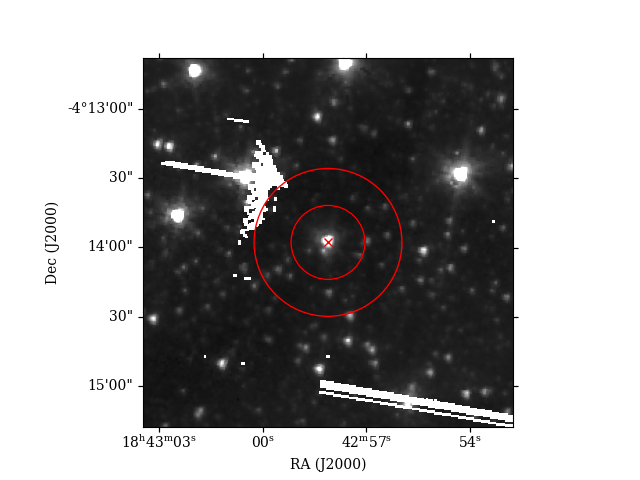

The aperture used is 16.0 arcsec
pixel scale is 0.6 arcsec/pixel
~ 26.666 pixels are used for the aperture radius
units in the image are: MJy/sr
Observing date: 2004-04-22 00:30:19.930
Wavelength: 4.5
############################
Flux bkg sub nan Jy
Flux         nan Jy
Background   nan Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


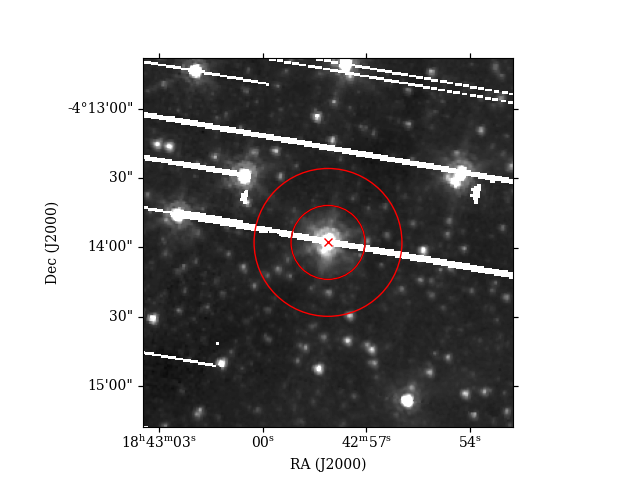

The aperture used is 16.0 arcsec
pixel scale is 0.6 arcsec/pixel
~ 26.666 pixels are used for the aperture radius
units in the image are: MJy/sr
Observing date: 2004-04-22 00:03:57.168
Wavelength: 5.8
############################
Flux bkg sub 5.0002880874883875 Jy
Flux         5.61076477289796 Jy
Background   0.6104766854095729 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


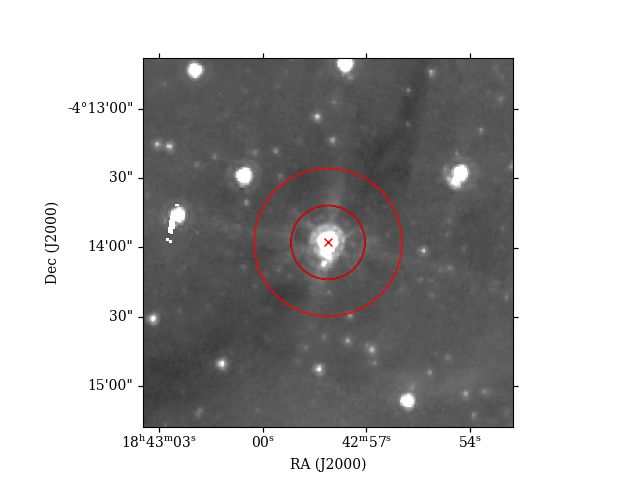

The aperture used is 16.0 arcsec
pixel scale is 0.6 arcsec/pixel
~ 26.666 pixels are used for the aperture radius
units in the image are: MJy/sr
Observing date: 2004-04-22 00:30:19.930
Wavelength: 8.0
############################
Flux bkg sub 7.862725457954781 Jy
Flux         9.369476952845952 Jy
Background   1.506751494891171 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


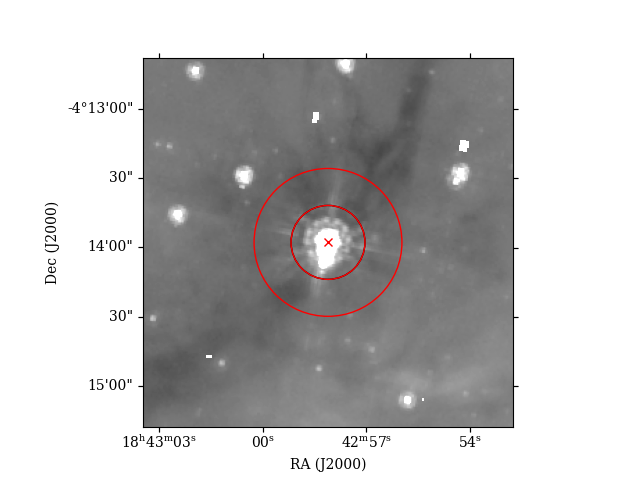

In [42]:
radius = 16.0
G28_S36_image = G28_S['SPITZER'][1][0]
G28_S36 = SedFluxer(G28_S36_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_S36_bkg,flux_S36=G28_S36.value
G28_S36.info
G28_S36.plot()


G28_S45_image = G28_S['SPITZER'][2][0]
G28_S45 = SedFluxer(G28_S45_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_S45_bkg,flux_S45=G28_S45.value
G28_S45.info
G28_S45.plot()


G28_S58_image = G28_S['SPITZER'][4][0]
G28_S58 = SedFluxer(G28_S58_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_S58_bkg,flux_S58=G28_S58.value
G28_S58.info
G28_S58.plot()


G28_S80_image = G28_S['SPITZER'][7][0]
G28_S80 = SedFluxer(G28_S80_image).get_flux(central_coords=G28_coord,
                                        aper_rad=radius,
                                        inner_annu=1.0*radius,
                                        outer_annu=2.0*radius)

flux_S80_bkg,flux_S80=G28_S80.value
G28_S80.info
G28_S80.plot()

The aperture used is 16.0 arcsec
pixel scale is 1.375 arcsec/pixel
~ 11.638 pixels are used for the aperture radius
units in the image are: PixelUnits:  DN
Observing date: Epoch:       January 2010 to February 2011
Wavelength: WISE 3.4 micron allWISE release
############################
Flux bkg sub 0.14047022867400397 Jy
Flux         0.20360544793727794 Jy
Background   0.06313521926327398 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


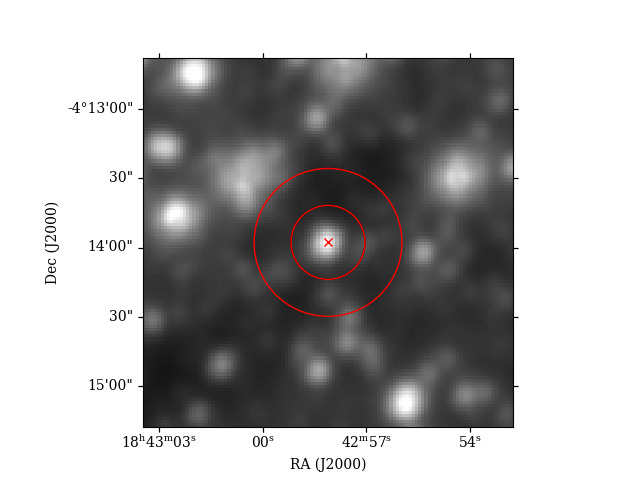

The aperture used is 16.0 arcsec
pixel scale is 1.375 arcsec/pixel
~ 11.638 pixels are used for the aperture radius
units in the image are: PixelUnits:  DN
Observing date: Epoch:       January 2010 to February 2011
Wavelength: WISE 4.6 micron allWISE release
############################
Flux bkg sub 0.3366199122251056 Jy
Flux         0.47319605649168656 Jy
Background   0.13657614426658093 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


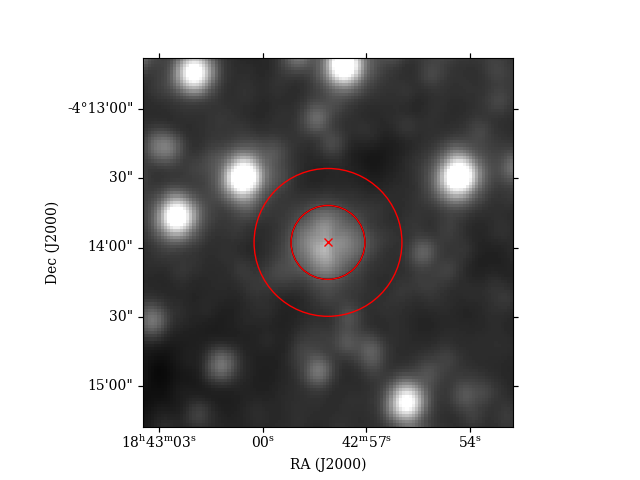

The aperture used is 16.0 arcsec
pixel scale is 1.375 arcsec/pixel
~ 11.638 pixels are used for the aperture radius
units in the image are: PixelUnits:  DN
Observing date: Epoch:       January 2010 to February 2011
Wavelength: WISE 12 micron allWISE release
############################
Flux bkg sub nan Jy
Flux         nan Jy
Background   nan Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


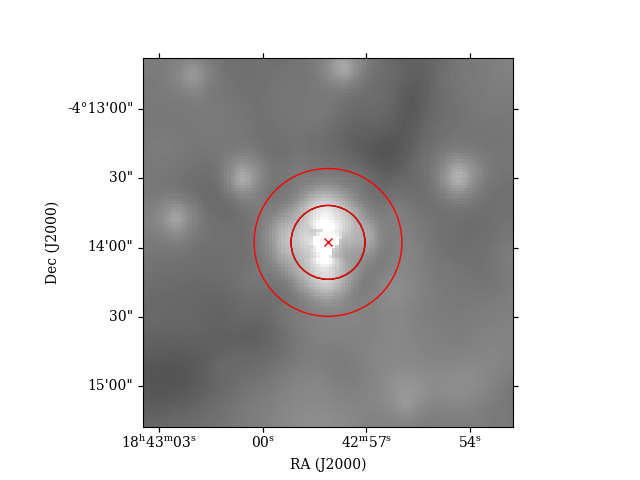

The aperture used is 16.0 arcsec
pixel scale is 1.375 arcsec/pixel
~ 11.638 pixels are used for the aperture radius
units in the image are: PixelUnits:  DN
Observing date: Epoch:       January 2010 to February 2011
Wavelength: WISE 22 micron allWISE release
############################
Flux bkg sub 15.15724074996447 Jy
Flux         43.15362369160915 Jy
Background   27.996382941644676 Jy
############################
(unitless in the case of get_raw_flux())


<IPython.core.display.Javascript object>


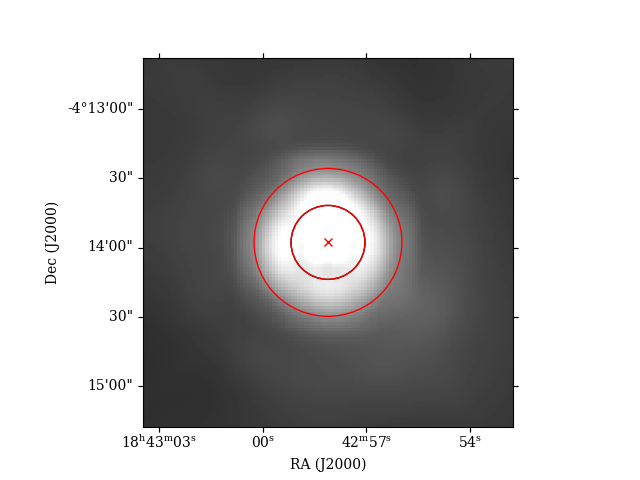

In [40]:
G28_W1_images = SkyView.get_images(position=G28_coord, survey=['WISE 3.4'],
                                pixels=500)

G28_W1_fluxer = SedFluxer(G28_W1_images).get_flux(central_coords=G28_coord,
                                                        aper_rad=radius,
                                                        inner_annu=1.0*radius,
                                                        outer_annu=2.0*radius)
flux_W1_bkg,flux_W1 = G28_W1_fluxer.value
G28_W1_fluxer.info
G28_W1_fluxer.plot()

G28_W2_images = SkyView.get_images(position=G28_coord, survey=['WISE 4.6'],
                                pixels=500)

G28_W2_fluxer = SedFluxer(G28_W2_images).get_flux(central_coords=G28_coord,
                                                        aper_rad=radius,
                                                        inner_annu=1.0*radius,
                                                        outer_annu=2.0*radius)
flux_W2_bkg,flux_W2 = G28_W2_fluxer.value
G28_W2_fluxer.info
G28_W2_fluxer.plot()


G28_W3_images = SkyView.get_images(position=G28_coord, survey=['WISE 12'],
                                pixels=500)

G28_W3_fluxer = SedFluxer(G28_W3_images).get_flux(central_coords=G28_coord,
                                                        aper_rad=radius,
                                                        inner_annu=1.0*radius,
                                                        outer_annu=2.0*radius)
flux_W3_bkg,flux_W3 = G28_W3_fluxer.value
G28_W3_fluxer.info
G28_W3_fluxer.plot()

G28_W4_images = SkyView.get_images(position=G28_coord, survey=['WISE 22'],
                                pixels=500)

G28_W4_fluxer = SedFluxer(G28_W4_images).get_flux(central_coords=G28_coord,
                                                        aper_rad=radius,
                                                        inner_annu=1.0*radius,
                                                        outer_annu=2.0*radius)
flux_W4_bkg,flux_W4 = G28_W4_fluxer.value
G28_W4_fluxer.info
G28_W4_fluxer.plot()

In [43]:
spitzer_bkgsub = np.array([flux_S36_bkg,flux_S45_bkg,flux_S58_bkg,flux_S80_bkg]) #Jy
spitzer = np.array([flux_S36,flux_S45,flux_S58,flux_S80]) #Jy
spitzer_error_perc = spitzer/spitzer_bkgsub-1.0

herschel_bkgsub = np.array([flux_H70_bkg,flux_H160_bkg,flux_H250_bkg,flux_H350_bkg,flux_H500_bkg]) #Jy
herschel = np.array([flux_H70,flux_H160,flux_H250,flux_H350,flux_H500]) #Jy
herschel_error_perc = herschel/herschel_bkgsub-1.0

wise_bkgsub = np.array([flux_W1_bkg,flux_W2_bkg,flux_W3_bkg,flux_W4_bkg])
wise = np.array([flux_W1,flux_W2,flux_W3,flux_W4])
wise_error_perc = wise/wise_bkgsub -1.0


<IPython.core.display.Javascript object>


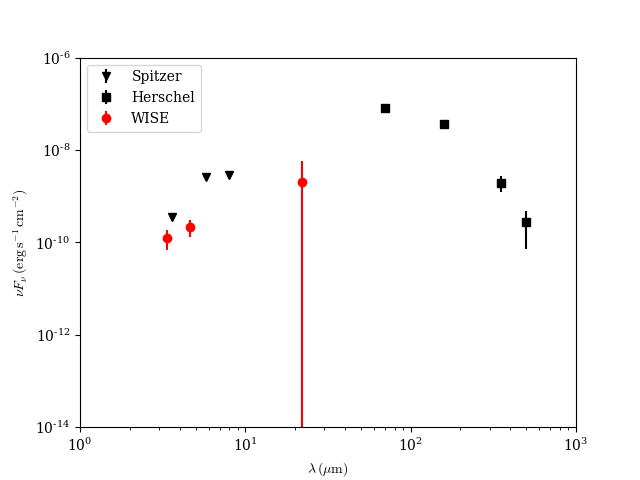

In [45]:
from astropy import constants as const
c_micron_s = const.c.to('micron/s').value

spitzer_lambda = np.array([3.6,4.5,5.8,8.0])
spitzer_bkgsub = np.array([flux_S36_bkg,flux_S45_bkg,flux_S58_bkg,flux_S80_bkg]) #Jy

herschel_lambda = np.array([70.0,160.0,250.0,350.0,500.0])
herschel_bkgsub = np.array([flux_H70_bkg,flux_H160_bkg,
                            flux_H250_bkg,flux_H350_bkg,flux_H500_bkg]) #Jy


wise_lambda = np.array([3.368,4.618,11.5608,22.0883])
wise_bkgsub = np.array([flux_W1_bkg,flux_W2_bkg,flux_W3_bkg,flux_W4_bkg])


nu_Fnu_spitzer_bkgsub = c_micron_s/spitzer_lambda*spitzer_bkgsub*1.0e-23 #erg s-1 cm-2
nu_Fnu_wise_bkgsub = c_micron_s/wise_lambda*wise_bkgsub*1.0e-23 #erg s-1 cm-2
nu_Fnu_herschel_bkgsub = c_micron_s/herschel_lambda*herschel_bkgsub*1.0e-23 #erg s-1 cm-2


fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
plt.errorbar(spitzer_lambda,nu_Fnu_spitzer_bkgsub, yerr=nu_Fnu_spitzer_bkgsub*spitzer_error_perc,fmt='kv',label='Spitzer')
plt.errorbar(herschel_lambda,nu_Fnu_herschel_bkgsub, yerr=nu_Fnu_herschel_bkgsub*herschel_error_perc,fmt='ks',label='Herschel')
plt.errorbar(wise_lambda,nu_Fnu_wise_bkgsub, yerr=nu_Fnu_wise_bkgsub*wise_error_perc,fmt='ro',label='WISE')
ax.set_xlabel(r'$\lambda\,(\mathrm{\mu m})$')
ax.set_ylabel(r'$\nu F_\nu\,(\mathrm{erg\,s^{-1}\,cm^{-2}})$')
ax.set_xlim(1,1e3)
ax.set_ylim(1e-14,1e-6)
plt.legend(loc='upper left')
plt.savefig('G28_SED.png',dpi=200)

# Let's fit

In [14]:
SedFitter().print_default_filters

filter wavelength   instrument  
------ ---------- --------------
    2J        1.2          2MASS
    2H        1.6          2MASS
    2K        2.2          2MASS
    I1        3.6   Spitzer_IRAC
    I2        4.5   Spitzer_IRAC
    I3        5.6   Spitzer_IRAC
    I4        8.0   Spitzer_IRAC
    M1       24.0   Spitzer_MIPS
    M2       70.0   Spitzer_MIPS
    M3      160.0   Spitzer_MIPS
    F1        5.4  SOFIA_FORCAST
    F2        6.4  SOFIA_FORCAST
    F3        6.6  SOFIA_FORCAST
    F4        7.7  SOFIA_FORCAST
    F5        8.6  SOFIA_FORCAST
    F6       11.1  SOFIA_FORCAST
    F7       11.3  SOFIA_FORCAST
    F8       19.2  SOFIA_FORCAST
    F9       24.2  SOFIA_FORCAST
    L1       31.5  SOFIA_FORCAST
    L2       33.6  SOFIA_FORCAST
    L3       34.8  SOFIA_FORCAST
    L4       37.1  SOFIA_FORCAST
    P1       70.0  Herschel_PACS
    P2      100.0  Herschel_PACS
    P3      160.0  Herschel_PACS
    P4      250.0 Herschel_SPIRE
    P5      350.0 Herschel_SPIRE
    P6    

In [64]:
len(G28_filter_arr)

12

<IPython.core.display.Javascript object>


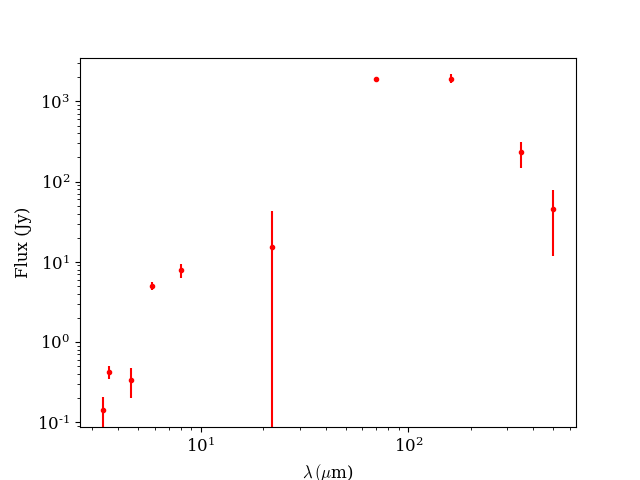

Text(0, 0.5, 'Flux (Jy)')

In [70]:
spitzer_lambda = np.array([3.6,5.8,8.0])
spitzer_bkgsub = np.array([flux_S36_bkg,flux_S58_bkg,flux_S80_bkg]) #Jy
spitzer = np.array([flux_S36,flux_S58,flux_S80]) #Jy
spitzer_error_perc = spitzer/spitzer_bkgsub-1.0

herschel_lambda = np.array([70.0,160.0,350.0,500.0])
herschel_bkgsub = np.array([flux_H70_bkg,flux_H160_bkg,flux_H350_bkg,flux_H500_bkg]) #Jy
herschel = np.array([flux_H70,flux_H160,flux_H350,flux_H500]) #Jy
herschel_error_perc = herschel/herschel_bkgsub-1.0

wise_lambda = np.array([3.368,4.618,22.0883])
wise_bkgsub = np.array([flux_W1_bkg,flux_W2_bkg,flux_W4_bkg])
wise = np.array([flux_W1,flux_W2,flux_W4])
wise_error_perc = wise/wise_bkgsub-1.0

G28_wave = np.concatenate([spitzer_lambda,wise_lambda,herschel_lambda])
G28_flux = np.concatenate([spitzer_bkgsub,wise_bkgsub,herschel_bkgsub])
G28_error = np.concatenate([spitzer_error_perc,wise_error_perc,herschel_error_perc])
# G28_error = np.zeros(len(G28_flux))
# G28_error[:] = 0.15

G28_filter_arr = np.array(['I1','I3','I4','W1','W2','W4','P1','P2','P4','P5']) #filter names

G28_dist = 5400.0 #distance to the source in pc

G28_upper_limit_idx = np.array([1,1,1,1,1,0,0,0,0,0],dtype=bool) #setting the indexes for upper limits. IMPORTANT TO SET IT TO BOOL

plt.figure()
plt.errorbar(G28_wave,G28_flux,yerr=G28_flux*G28_error,fmt='r.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda\,(\mu$m)')
plt.ylabel('Flux (Jy)')

In [71]:
np.savetxt('G28_fluxes_for_SED.txt',np.c_[(G28_wave,G28_flux,G28_error)])

In [72]:
G28_sed = SedFitter('kmh',G28_wave,G28_flux,G28_error,
                       G28_upper_limit_idx,G28_filter_arr)

In [73]:
G28_sed_results = G28_sed.sed_fit(dist=G28_dist,AV_max=1000,method='minimize')

  0%|          | 0/8640 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/sedcreator/__init__.py:1116: RuntimeWarning: invalid value encountered in log10
  errlo_fit_log_arr=-np.log10(1.-self.err_flux_array,dtype=np.float64)# note 100% error means a infinite lower error in log
/opt/anaconda3/lib/python3.7/site-packages/sedcreator/__init__.py:1075: RuntimeWarning: invalid value encountered in log10
  errlo_fit_log_arr=-np.log10(1.-self.err_flux_array,dtype=np.float64)# note 100% error means a infinite lower error in log
/opt/anaconda3/lib/python3.7/site-packages/sedcreator/__init__.py:1256: RuntimeWarning: divide by zero encountered in log10
  flux_model_Jy_log=np.log10(flux_model_Jy,dtype=np.float64)
100%|██████████| 8640/8640 [01:14<00:00, 116.60it/s]


In [74]:
G28_model_4p = G28_sed_results.get_model_info() #considering 4p (mcore,sigma,mstar,theta_view) unique values
G28_model_3p = G28_sed_results.get_model_info(keys=['mcore','sigma','mstar']) #considering 3p (mcore,sigma,mstar) unique values

SedFitter().table2latex(G28_model_3p[0:5])

In [75]:
G28_model_3p

SED_number,chisq,chisq_nonlim,mcore,sigma,mstar,theta_view,dist,av,rcore,massenv,theta_w_esc,rstar,lstar,tstar,mdisk,rdisk,mdotd,lbol,lbol_iso,lbol_av,t_now
,,,solMass,g / cm2,solMass,deg,pc,mag,pc,solMass,deg,solRad,solLum,K,solMass,AU,solMass / yr,solLum,solLum,solLum,yr
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12_04_08_02,0.05844,0.11689,240.0,3.16,24.0,22.33165,5400.0,277.83907,0.06413,194.4982,18.1826,23.2179,263662.0,27158.3,8.0,52.3478,1.61657e-03,3.05090e+05,4.42531e+05,8.06089e+04,2.89880e+04
15_03_10_18,0.05963,0.11926,480.0,1.0,48.0,82.81924,5400.0,346.32555,0.16122,366.9562,25.3955,9.79176,393890.0,46234.4,16.0,131.825,1.09213e-03,5.42510e+05,2.15944e+05,7.14184e+04,8.17455e+04
12_04_09_01,0.06712,0.13424,240.0,3.16,32.0,12.83857,5400.0,339.32187,0.06413,175.3171,23.4285,14.454,390948.0,37982.8,10.66667,70.5107,1.85926e-03,4.99180e+05,3.65948e+06,8.13118e+04,3.45547e+04
15_03_09_20,0.06957,0.13915,480.0,1.0,32.0,88.56746,5400.0,304.86384,0.16122,414.2991,18.5112,7.86715,189403.0,42952.6,10.66667,97.6262,9.30650e-04,2.95187e+05,1.80302e+05,7.20361e+04,6.61465e+04
15_03_08_20,0.07218,0.14437,480.0,1.0,24.0,88.56746,5400.0,267.48628,0.16122,433.4302,14.518,7.80309,138858.0,39908.1,8.0,79.8566,8.22049e-04,2.09275e+05,1.58881e+05,7.24173e+04,5.71280e+04
15_03_11_12,0.07979,0.15958,480.0,1.0,64.0,64.84934,5400.0,345.47774,0.16122,324.6342,31.7351,11.7063,658762.0,48086.6,21.33333,170.326,1.20718e-03,8.40671e+05,2.38223e+05,7.13503e+04,9.62344e+04
13_04_07_16,0.08537,0.17075,320.0,3.16,16.0,76.99712,5400.0,18.43246,0.074051,293.1408,11.6466,44.9423,95434.3,15140.8,5.333333,35.7811,1.43783e-03,1.05890e+05,8.72416e+04,8.23566e+04,2.16187e+04
14_03_08_09,0.09659,0.19318,400.0,1.0,24.0,54.90037,5400.0,212.52893,0.147173,347.9594,16.0356,7.58992,131873.0,39945.9,8.0,80.7763,7.74671e-04,2.00037e+05,1.43120e+05,7.26170e+04,5.94534e+04


In [76]:
G28_sed_results.get_average_model(G28_model_3p)

method,number_of_models_used,mcore,Dmcore,sigma,Dsigma,mstar,Dmstar,theta_view,Dtheta_view,dist,av,Dav,rcore,Drcore,massenv,Dmassenv,theta_w_esc,Dtheta_w_esc,rstar,Drstar,lstar,Dlstar,tstar,Dtstar,mdisk,Dmdisk,rdisk,Drdisk,mdotd,Dmdotd,lbol,Dlbol,lbol_iso,Dlbol_iso,lbol_av,Dlbol_av,t_now,Dt_now
,,solMass,,g / cm2,,solMass,,deg,deg,pc,mag,mag,pc,,solMass,,deg,deg,solRad,,solLum,,K,,solMass,,AU,,solMass / yr,,solLum,,solLum,,solLum,,yr,
str22,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
average model method 1,5,363.77198,1.46178,1.58444,1.87798,30.93091,1.32932,59.02487,34.03313,5400.0,307.16732,31.64591,0.11150,1.65686,295.33672,1.54426,2.00072e+01,3.90993,11.50671,1.59261,2.54507e+05,1.57727,3.82385e+04,1.22784,10.31031,1.32932,8.23769e+01,1.41430,1.20221e-03,1.42265,3.48002e+05,1.48731,3.98250e+05,3.67552,7.54307e+04,1.06698,4.99010e+04,1.55139


<IPython.core.display.Javascript object>


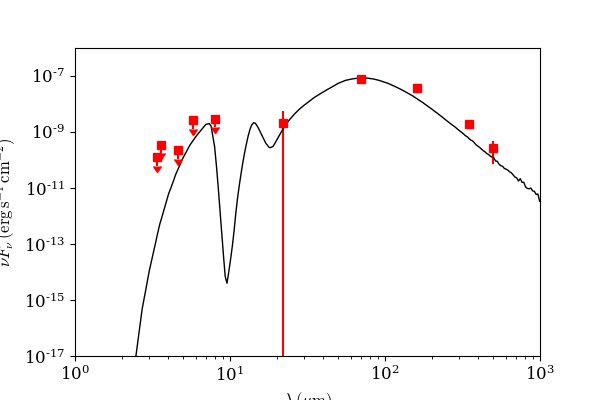

Image saved in  ./


<IPython.core.display.Javascript object>


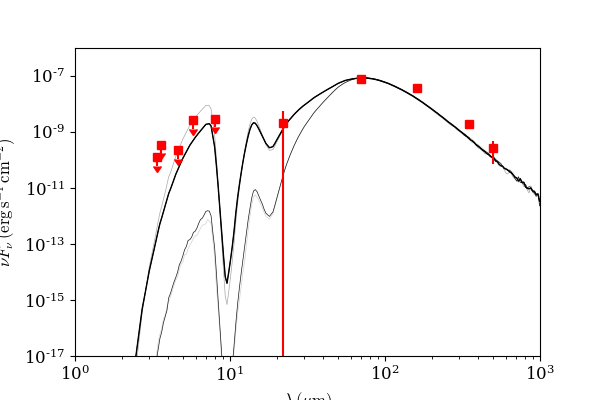

Image saved in  ./


<IPython.core.display.Javascript object>


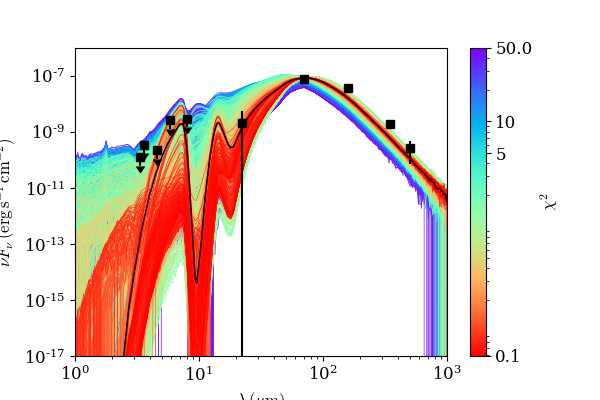

Image saved in  ./


<IPython.core.display.Javascript object>


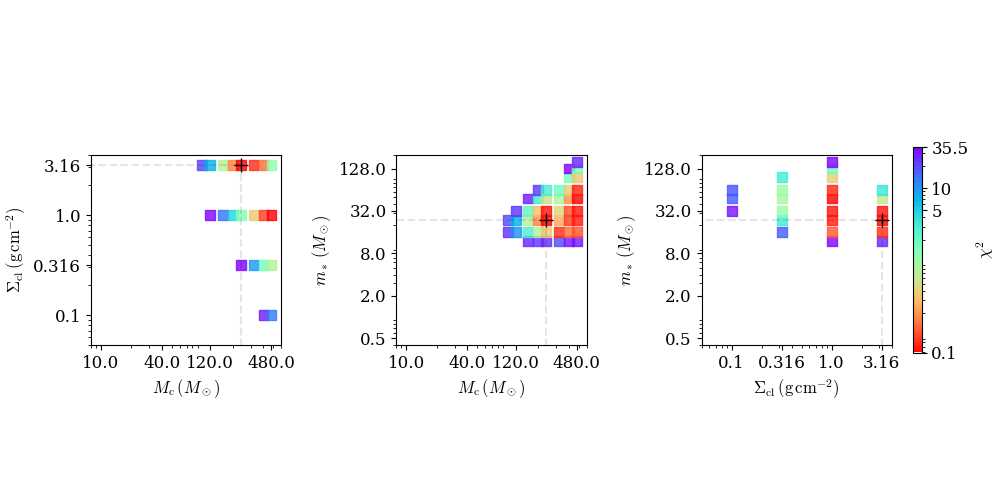

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Image saved in  ./


In [77]:
md = ModelPlotter(G28_sed_results)
md.plot_best_sed(G28_model_3p,xlim=[1e0,1e3],ylim=[1e-17,1e-6],marker='rs',path='./',figname='G28_best_SED.pdf')
md.plot_multiple_seds(G28_model_3p[0:5],xlim=[1e0,1e3],ylim=[1e-17,1e-6],marker='rs',cmap='gray',colorbar=False,path='./',figname='G28_best5_models.pdf')
md.plot_multiple_seds(G28_model_4p[G28_model_4p['chisq']<50.0],xlim=[1e0,1e3],ylim=[1e-17,1e-6],marker='ks',path='./',figname='G28_chisq50_models.pdf')
md.plot2d(G28_model_3p[G28_model_3p['chisq']<=50.0],path='./',figname='G28_2dplot.pdf')

In [78]:
G28_sed_results_IDL = G28_sed.sed_fit(dist=G28_dist,AV_max=1000,method='idl')

/opt/anaconda3/lib/python3.7/site-packages/sedcreator/__init__.py:1189: RuntimeWarning: invalid value encountered in log10
  errlo_fit_log_arr=-np.log10(1.-self.err_flux_array,dtype=np.float64)# note 100% error means a infinite lower error in log
100%|██████████| 15/15 [07:10<00:00, 28.71s/it]


In [82]:
G28_model_4p_IDL = G28_sed_results_IDL.get_model_info() #considering 4p (mcore,sigma,mstar,theta_view) unique values
G28_model_3p_IDL = G28_sed_results_IDL.get_model_info(keys=['mcore','sigma','mstar'],path='./',tablename='G28_IDL_432models.txt') #considering 3p (mcore,sigma,mstar) unique values

Table saved in  ./


<IPython.core.display.Javascript object>


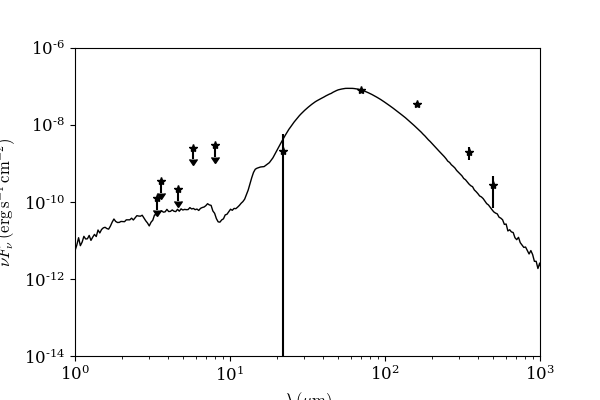

Image saved in  ./


<IPython.core.display.Javascript object>


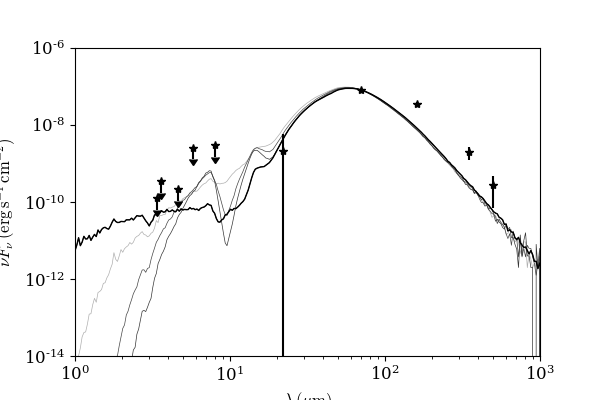

Image saved in  ./


<IPython.core.display.Javascript object>


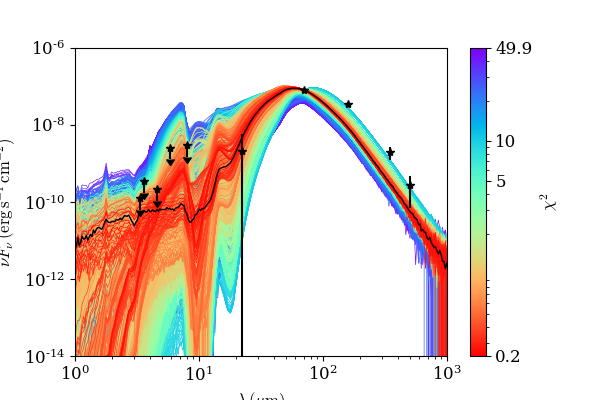

Image saved in  ./


<IPython.core.display.Javascript object>


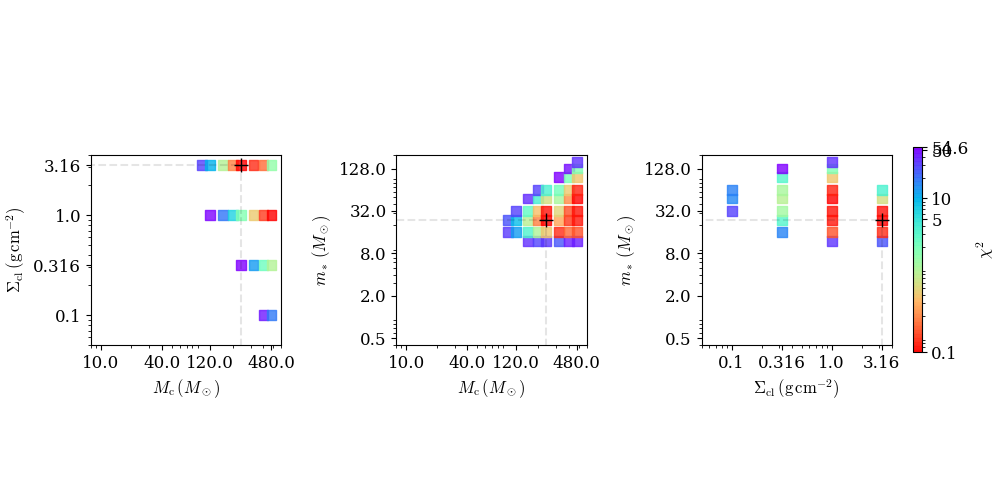

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Image saved in  ./


In [83]:
md_IDL = ModelPlotter(G28_sed_results_IDL)
md_IDL.plot_best_sed(G28_model_3p_IDL,xlim=[1e0,1e3],ylim=[1e-14,1e-6],path='./',figname='G28_best_SED_IDL.pdf')
md_IDL.plot_multiple_seds(G28_model_3p_IDL[0:5],xlim=[1e0,1e3],ylim=[1e-14,1e-6],cmap='gray',colorbar=False,path='./',figname='G28_best5_models_IDL.pdf')
md_IDL.plot_multiple_seds(G28_model_4p_IDL[G28_model_4p_IDL['chisq']<50.0],xlim=[1e0,1e3],ylim=[1e-14,1e-6],path='./',figname='G28_chisq50_models_IDL.pdf')
md_IDL.plot2d(G28_model_3p[G28_model_3p_IDL['chisq']<=50.0],path='./',figname='G28_2dplot_IDL.pdf')

# Adding a defined filter 

In [42]:
SedFitter().print_default_filters

filter wavelength   instrument  
------ ---------- --------------
    2J        1.2          2MASS
    2H        1.6          2MASS
    2K        2.2          2MASS
    I1        3.6   Spitzer_IRAC
    I2        4.5   Spitzer_IRAC
    I3        5.6   Spitzer_IRAC
    I4        8.0   Spitzer_IRAC
    M1       24.0   Spitzer_MIPS
    M2       70.0   Spitzer_MIPS
    M3      160.0   Spitzer_MIPS
    F1        5.4  SOFIA_FORCAST
    F2        6.4  SOFIA_FORCAST
    F3        6.6  SOFIA_FORCAST
    F4        7.7  SOFIA_FORCAST
    F5        8.6  SOFIA_FORCAST
    F6       11.1  SOFIA_FORCAST
    F7       11.3  SOFIA_FORCAST
    F8       19.2  SOFIA_FORCAST
    F9       24.2  SOFIA_FORCAST
    L1       31.5  SOFIA_FORCAST
    L2       33.6  SOFIA_FORCAST
    L3       34.8  SOFIA_FORCAST
    L4       37.1  SOFIA_FORCAST
    P1       70.0  Herschel_PACS
    P2      100.0  Herschel_PACS
    P3      160.0  Herschel_PACS
    P4      250.0 Herschel_SPIRE
    P5      350.0 Herschel_SPIRE
    P6    

In [48]:
HAWC_A_lambda, HAWC_A_response= np.loadtxt('../Taniguchi_G24/SOFIA_HAWC.A.dat',unpack=True)
HAWC_A_lambda_D, HAWC_A_response_D= np.loadtxt('/opt/anaconda3/lib/python3.7/site-packages/sed_creator/Model_SEDs/parfiles/H1.txt',unpack=True)
BandA = np.loadtxt('../Taniguchi_G24/BandA.txt',unpack=True)
HAWC_A_lambda_P, HAWC_A_response_P = BandA[0],BandA[1]

<IPython.core.display.Javascript object>


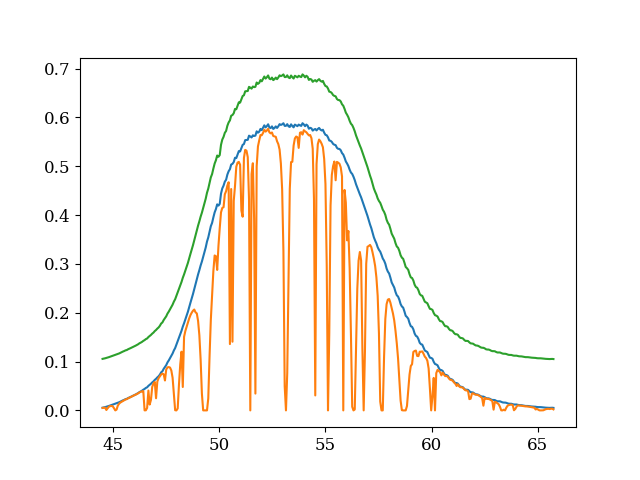

In [50]:
plt.figure()
plt.plot(HAWC_A_lambda*1e-4, HAWC_A_response)
plt.plot(HAWC_A_lambda_D, HAWC_A_response_D)
plt.plot(HAWC_A_lambda_P, HAWC_A_response_P+0.1)

In [37]:
HAWC_A_lambda = HAWC_A_lambda*1.0e-4 #micron

In [40]:
SedFitter().add_filter('HAWC_Paul','SOFIA_HAWC',HAWC_A_lambda,HAWC_A_response)

HAWC_Paul.txt succesfully saved in /opt/anaconda3/lib/python3.7/site-packages/sed_creator/Model_SEDs/parfiles/
